In [23]:
import pandas as pd
import os
from tqdm import tqdm
import csv
import re
from collections import Counter
from chin_chime.face_landmark_extractor import get_landmarks

2024-09-12 20:16:44.196685: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I0000 00:00:1726139805.325555 1834862 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1726139805.480965 1834923 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 555.42.02), renderer: NVIDIA RTX A5000/PCIe/SSE2
W0000 00:00:1726139805.482465 1834862 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1726139805.516869 1834929 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726139805.542666 1834935 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [3]:
merged_folder_path = './iemocap_processed/merged'
merged_files = sorted(
    [os.path.join(merged_folder_path, file) for file in (os.listdir(merged_folder_path))]
)

In [7]:
train_data = pd.read_pickle('./iemocap_processed/pickled/train.pkl')
test_data = pd.read_pickle('./iemocap_processed/pickled/test.pkl')

len(train_data), len(test_data)

(372143, 123399)

In [6]:
train_data.head()

,Time,X01,Y01,Z01,X02,Y02,Z02,X03,Y03,Z03,...,Y53,Z53,X60,Y60,Z60,X61,Y61,Z61,label,session
Frame#,,,,,,,,,,,,,,,,,,,,,
909,7.58266,-27.56770,34.97618,-54.40529,-0.23704,25.24322,-61.08478,23.64563,36.21480,-56.81348,...,24.13990,-45.04360,55.95958,56.64390,121.62669,-45.31238,52.59035,129.44393,Neutral,Ses01F_impro01.csv
910,7.59100,-27.59504,34.97534,-54.53862,-0.14238,25.29796,-61.08746,23.63664,36.28221,-56.91864,...,24.20146,-45.19563,55.99112,56.57716,121.61237,-45.29489,52.42889,129.39733,Neutral,Ses01F_impro01.csv
911,7.59934,-27.62559,34.94876,-54.60670,-0.15016,25.26522,-61.18179,23.59330,36.19091,-57.06784,...,24.20199,-45.38675,56.02899,56.47296,121.58130,-45.28643,52.32635,129.36415,Neutral,Ses01F_impro01.csv
912,7.60768,-27.66087,34.82575,-54.76922,-0.11912,25.22126,-61.34704,23.66278,36.07449,-57.22832,...,24.22021,-45.60330,56.02719,56.37018,121.55001,-45.29266,52.30411,129.36309,Neutral,Ses01F_impro01.csv
913,7.61602,-27.59027,34.67632,-54.79646,-0.14865,25.16280,-61.38764,23.70279,35.97943,-57.33681,...,24.12938,-45.68056,56.03284,56.31125,121.55555,-45.30947,52.35530,129.35845,Neutral,Ses01F_impro01.csv


In [48]:
import cv2
import numpy as np


def extract_landmarks(file_path: str, frame_ids: list, emotion: str, base_path: str):
    index_to_extract = 0

    counter = 0
    
    n = len(frame_ids)
    save_folder = os.path.join(base_path, emotion)
    os.makedirs(save_folder, exist_ok=True)
    cap = cv2.VideoCapture(file_path)
    while True:
        counter += 1
        
        ret, frame = cap.read()
                
        if not ret:
            break
        
        if counter != frame_ids[index_to_extract]:
            continue
        print(counter, "extracting_landmarks")
        landmarks = get_landmarks(frame)
        index_to_extract += 1
        
        if landmarks is None:
            print("No landmarks")
            continue
        
        save_path = os.path.join(save_folder, 'frane'+str(frame_ids) + '.npy')
        np.save(save_path, landmarks)
        
    cap.close()
        

for session_name, group in train_data.groupby('session'):
    print(session_name)
    print(sorted(group.index.tolist()))
    break
# for row in tqdm(range(train_data.shape[0])):
#     data = train_data.iloc[row]
#     filenmae = data['session']
#     frame_no = data["Frame #"]

Ses01F_impro01.csv
[909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350,

In [49]:
iemocap_dataset_path = r'/media/cv/Extreme Pro/IEMOCAP/IEMOCAP_full_release/Session1/dialog/avi/DivX/Ses01M_script02_1.avi'
os.path.exists(iemocap_dataset_path)

True

In [50]:
extract_landmarks(iemocap_dataset_path, [10, 20, 30], 'test', 'test')

10 extracting_landmarks
No landmarks
20 extracting_landmarks
No landmarks
30 extracting_landmarks
No landmarks


IndexError: list index out of range

# Training

In [21]:
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


lower_landmarks = [
    'RC1', 'RC2', 'RC4', 'LC1', 'LC2', 'LC4', 'CH1', 'CH2', 'CH3', 'Mou1', 'Mou2', 'Mou3', 'Mou4', 'Mou5',
    'Mou6', 'Mou7', 'Mou8', 'RNSTRL', 'LNSTRL', 'TNOSE']
all_landmarks = [
    'CH1', 'CH2', 'CH3', 'FH1', 'FH2', 'FH3', 'LC1', 'LC2', 'LC3', 'LC4', 'LC5', 'LC6', 'LC7', 'LC8', 
    'RC1', 'RC2', 'RC3', 'RC4', 'RC5', 'RC6', 'RC7', 'RC8', 'LLID', 'RLID', 'MH', 'MNOSE', 'LNSTRL', 
    'TNOSE', 'RNSTRL', 'LBM0', 'LBM1', 'LBM2', 'LBM3', 'RBM0', 'RBM1', 'RBM2', 'RBM3', 'LBRO1', 'LBRO2', 
    'LBRO3', 'LBRO4', 'RBRO1', 'RBRO2', 'RBRO3', 'RBRO4', 'Mou1', 'Mou2', 'Mou3', 'Mou4', 'Mou5', 'Mou6', 
    'Mou7', 'Mou8', 'LHD', 'RHD']

class IEMOCAPLandmark(nn.Module):
    def __init__(self, path):
        self.df = pd.read_pickle(path)
        self.df = self.df.loc[ self.df['label'] != 'Other']
        
        self.id2joints = {
            1: 'CH1', 2: 'CH2', 3: 'CH3', 4: 'FH1', 5: 'FH2', 6: 'FH3', 7: 'LC1', 8: 'LC2', 9: 'LC3', 10: 'LC4', 
            11: 'LC5', 12: 'LC6', 13: 'LC7', 14: 'LC8', 15: 'RC1', 16: 'RC2', 17: 'RC3', 18: 'RC4', 19: 'RC5', 20: 'RC6',
            21: 'RC7', 22: 'RC8', 23: 'LLID', 24: 'RLID', 25: 'MH', 26: 'MNOSE', 27: 'LNSTRL', 28: 'TNOSE', 29: 'RNSTRL', 30: 'LBM0', 
            31: 'LBM1', 32: 'LBM2', 33: 'LBM3', 34: 'RBM0', 35: 'RBM1', 36: 'RBM2', 37: 'RBM3', 38: 'LBRO1', 39: 'LBRO2', 40: 'LBRO3', 
            41: 'LBRO4', 42: 'RBRO1', 43: 'RBRO2', 44: 'RBRO3', 45: 'RBRO4', 46: 'Mou1', 47: 'Mou2', 48: 'Mou3', 49: 'Mou4', 50: 'Mou5', 
            51: 'Mou6', 52: 'Mou7', 53: 'Mou8', 54: 'LHD', 55: 'RHD'
        }
        self.joints2ids = {v:k for k, v in self.id2joints.items()}

        self.label2id = {
            'Frustration':0,
            'Anger':1,
            'Excited':2,
            'Neutral':3,
            'Happiness':4,
            'Sadness':5,
            'Fear':6,
            'Surprise':7,
        }

        self.id2label = {
            0: 'Frustration',
            1: 'Anger',
            2: 'Excited',
            3: 'Neutral',
            4: 'Happiness',
            5: 'Sadness',
            6: 'Fear',
            7: 'Surprise',
        }

    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        row = torch.tensor(self.df.iloc[index]['X01': 'Z61'].astype(float).to_numpy(), dtype=torch.float32)
        label = torch.tensor(self.label2id[self.df.iloc[index]['label']])
        return (row, label)
        

In [22]:
class MLPLandmark(nn.Module):
    def __init__(self, inp_dim: int, out_dim: int, layers: list):
        super().__init__()
        
        self.inp_dim = inp_dim
        
        self.mlp = nn.ModuleList()
        
        self.mlp.append(nn.Linear(self.inp_dim, layers[0]))
        
        for i in range(1, len(layers)):
            self.mlp.append(
                nn.Sequential(
                    nn.Linear(layers[i-1], layers[i]),
                    nn.ReLU(),
                    nn.LayerNorm(layers[i])
                )
            )
        
        self.mlp.append(nn.Linear(layers[-1], out_dim))
        
    def forward(self, x: torch.Tensor):
        x = x.view(x.shape[0], self.inp_dim)
        
        for layer in self.mlp:
            x = layer(x)
        
        return x

In [23]:

test_acc = []
test_loss = [0]
train_loss = [0]
train_step = [0]


def train(weights_save_path):
    
    '''
    Updates the global variables need to check that
    '''
    
    eval_loss = 0.0
    eval_acc = 0.0
    max_eval_acc = -1
    
    for epoch in range(epochs):
        model.train()
        
        for i, batch in enumerate(trainloader):
            # zero gradients
            optimizer.zero_grad()
            
            landmarks, labels = batch
            landmarks: torch.Tensor =landmarks.to(device)
            labels: torch.Tensor = labels.to(device)
            
            logits = model(landmarks)
            loss = criterion(logits, labels)
            
            
            #back_prop
            loss.backward()
            optimizer.step()
            
            if i % 500 == 0:
                print(f"Epoch: {epoch} | iteration {i}/{len(trainloader)} | Loss: {loss.item():.4f} | Last Eval Loss: {eval_loss:.4f}| Last Eval Accuracy: {eval_acc:.4f}")
            
            # track stats
            train_loss.append(loss.item())
            train_step.append(train_step[-1] + 1)
        
        # evaluate the model
        eval_loss, eval_acc = test()
        
        # track evaluation dataset stats
        test_acc.append(eval_acc)
        test_loss.append(eval_loss)
        
        # save the best model
        if eval_acc > max_eval_acc:
            torch.save(model.state_dict(), weights_save_path)
            max_eval_acc = eval_acc
        
    print("Evaluation Loss: ",  eval_loss, eval_acc)
    
    
@torch.no_grad()         
def test():
    preds_ = []
    labels_ = []
    eval_loss = []
    model.eval()
    for i, batch in enumerate(testloader):
        
        landmarks, labels = batch
        landmarks = landmarks.to(device)
        labels = labels.to(device)
        
        logits = model(landmarks)
        
        preds = torch.argmax(logits, dim=1)
        preds_.extend((preds.cpu().tolist()))
        labels_.extend(labels.cpu().tolist())
        
        loss = criterion(logits, labels)
        
        eval_loss.append(loss.item())
    
    return (sum(eval_loss)/len(eval_loss), accuracy_score(preds_, labels_))

In [24]:
device='cuda:1'
epochs = 20
lr = 1e-5


model = MLPLandmark(inp_dim=165, out_dim=8, layers=[1024, 1024, 1024]).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

BATCH_SIZE = 128

train_dataset = IEMOCAPLandmark('./iemocap_processed/pickled/train.pkl')
test_dataset = IEMOCAPLandmark('./iemocap_processed/pickled/test.pkl')

trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [25]:
len(train_dataset), len(test_dataset)

(370956, 123198)

In [28]:
test_acc = []
test_loss = [0]
train_loss = [0]
train_step = [0]

train('./model_weights/landmark_all_iemocap_emotion.pt')

Epoch: 0 | iteration 0/2899 | Loss: 1.4410 | Last Eval Loss: 0.0000| Last Eval Accuracy: 0.0000
Epoch: 0 | iteration 500/2899 | Loss: 1.4202 | Last Eval Loss: 0.0000| Last Eval Accuracy: 0.0000


Text(0, 0.5, 'Loss')

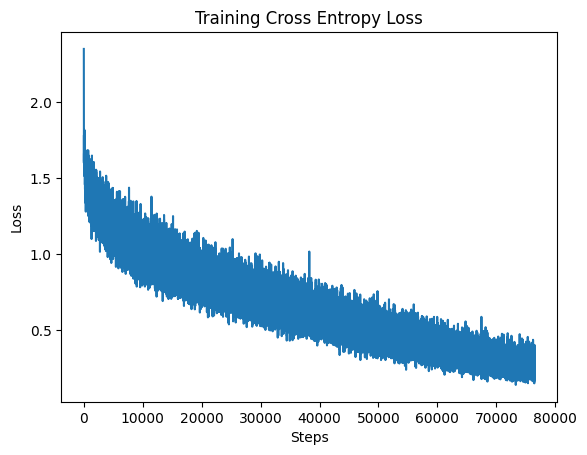

In [69]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(train_step[1:], train_loss[1:])
plt.title("Training Cross Entropy Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")

In [27]:
plt.plot(np.array(test_acc) * 100)
plt.title("Test Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy Score %")

NameError: name 'plt' is not defined

In [71]:
class IEMOCAPLandmarkLower(nn.Module):
    def __init__(self, path):
        self.df = pd.read_pickle(path)
        self.df = self.df.loc[ self.df['label'] != 'Other']
        
        self.columns_to_extract = [
            'X15', 'Y15', 'Z15', 'X16', 'Y16', 'Z16', 'X18', 'Y18', 'Z18', 'X07',
            'Y07', 'Z07', 'X08', 'Y08', 'Z08', 'X10', 'Y10', 'Z10', 'X01', 'Y01',
            'Z01', 'X02', 'Y02', 'Z02', 'X03', 'Y03', 'Z03', 'X46', 'Y46', 'Z46',
            'X47', 'Y47', 'Z47', 'X48', 'Y48', 'Z48', 'X49', 'Y49', 'Z49', 'X50',
            'Y50', 'Z50', 'X51', 'Y51', 'Z51', 'X52', 'Y52', 'Z52', 'X53', 'Y53',
            'Z53', 'X29', 'Y29', 'Z29', 'X27', 'Y27', 'Z27', 'X28', 'Y28', 'Z28'
            ]
        
        self.label2id = {
            'Frustration':0,
            'Anger':1,
            'Excited':2,
            'Neutral':3,
            'Happiness':4,
            'Sadness':5,
            'Fear':6,
            'Surprise':7,
        }

        self.id2label = {
            0: 'Frustration',
            1: 'Anger',
            2: 'Excited',
            3: 'Neutral',
            4: 'Happiness',
            5: 'Sadness',
            6: 'Fear',
            7: 'Surprise',
        }

    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        row = torch.tensor(self.df.iloc[index][self.columns_to_extract].astype(float).to_numpy(), dtype=torch.float32)
        label = torch.tensor(self.label2id[self.df.iloc[index]['label']])
        return (row, label)

In [72]:
device='cuda:1'
epochs = 20
lr = 1e-6


model = MLPLandmark(inp_dim=60, out_dim=8, layers=[1024, 1024, 1024]).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

BATCH_SIZE = 128

train_dataset = IEMOCAPLandmarkLower('./iemocap_processed/pickled/train.pkl')
test_dataset = IEMOCAPLandmarkLower('./iemocap_processed/pickled/test.pkl')

trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [73]:
test_acc = []
test_loss = [0]
train_loss = [0]
train_step = [0]

train('./model_weights/landmark_lower_iemocap_emotion.pt')

Epoch: 0 | iteration 0/3826 | Loss: 2.0979 | Last Eval Loss: 0.0000| Last Eval Accuracy: 0.0000
Epoch: 0 | iteration 500/3826 | Loss: 1.6316 | Last Eval Loss: 0.0000| Last Eval Accuracy: 0.0000
Epoch: 0 | iteration 1000/3826 | Loss: 1.5446 | Last Eval Loss: 0.0000| Last Eval Accuracy: 0.0000
Epoch: 0 | iteration 1500/3826 | Loss: 1.6642 | Last Eval Loss: 0.0000| Last Eval Accuracy: 0.0000
Epoch: 0 | iteration 2000/3826 | Loss: 1.5450 | Last Eval Loss: 0.0000| Last Eval Accuracy: 0.0000
Epoch: 0 | iteration 2500/3826 | Loss: 1.5481 | Last Eval Loss: 0.0000| Last Eval Accuracy: 0.0000
Epoch: 0 | iteration 3000/3826 | Loss: 1.4287 | Last Eval Loss: 0.0000| Last Eval Accuracy: 0.0000
Epoch: 0 | iteration 3500/3826 | Loss: 1.3701 | Last Eval Loss: 0.0000| Last Eval Accuracy: 0.0000
Epoch: 1 | iteration 0/3826 | Loss: 1.5394 | Last Eval Loss: 1.5595| Last Eval Accuracy: 0.6394
Epoch: 1 | iteration 500/3826 | Loss: 1.4253 | Last Eval Loss: 1.5595| Last Eval Accuracy: 0.6394
Epoch: 1 | iterati

Text(0, 0.5, 'Loss')

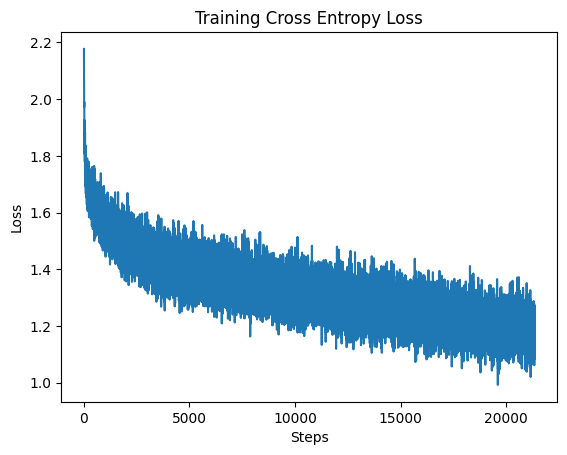

In [ ]:
plt.plot(train_step[1:], train_loss[1:])
plt.title("Training Cross Entropy Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")

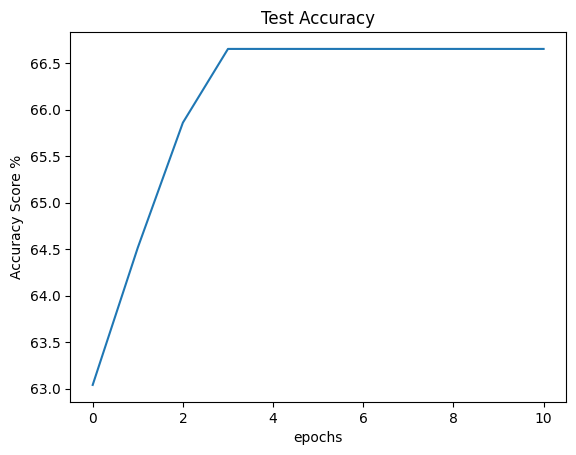

In [ ]:
plt.plot(np.array(test_acc) * 100)
plt.title("Test Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy Score %")
plt.show()